CA1 Data Analysis and Visualization

I create a composite indicator to evaluate chess openings based on 3 index: effectiveness, popularity, and complexity. This indicator will integrate various metrics such as win rates, frequency of use to offer a comprehensive assessment of each opening.

I will use the following dataset: (Available at: https://www.kaggle.com/datasets/alexandrelemercier/all-chess-openings)

In [6]:
import pandas as pd

df = pd.read_csv('archive/openings.csv')
print(df.head())


   Unnamed: 0                                            Opening Colour  \
0           0                 Alekhine Defense, Balogh Variation  white   
1           1               Alekhine Defense, Brooklyn Variation  black   
2           2               Alekhine Defense, Exchange Variation  white   
3           3                Alekhine Defense, Four Pawns Attack  white   
4           4  Alekhine Defense, Four Pawns Attack, Fianchett...  black   

   Num Games  ECO Last Played  Perf Rating  Avg Player  Player Win %  Draw %  \
0        692  B03  2018-06-22         2247        2225          40.8    24.3   
1        228  B02  2018-06-27         2145        2193          29.8    22.4   
2       6485  B03  2018-07-06         2244        2194          40.8    27.7   
3        881  B03  2018-06-20         2187        2130          39.7    23.2   
4        259  B03  2018-05-20         2122        2178          37.8    21.2   

   ...  move2b move3w move3b move4w move4b White_win% Black_win% Whi

1. Theoretical Framework: Chess Openings

In chess, the choice of opening can be a determining factor in a player's success. For this reason, the proposed composite index seeks to quantify the multiple facets of chess openings, by synthesizing data relating to various dimensions: effectiveness, popularity and complexity. The aim is to provide a tool that players of all levels can use to make informed decisions about their repertoire of openings, facilitating strategic preparation and decision-making.

The data selected comes from an extensive database of recorded games, covering a wide range of games, from amateur encounters to grandmaster confrontations. This comprehensive collection ensures that the index is representative of the entire chess-playing community. Drawing on quantifiable measures such as win and draw percentages, frequency of use and move sequences.

Data select:
    - Num Games
    - Last Played
    - Perf Rating
    - Avg Player Rating
    - Player Win %
    - Draw %
    - Opponent Win %
    - Number of moves

Popularity indicator:
    Num Games: How frequently the opening is used.
    Last Played: Recent use to identify current trends.
Performance indicator:
    Perf Rating and Avg Player Rating: average success and skill level associated with the openings.
    Player Win %, Draw %, Opponent Win %: Direct outcomes when the opening is used.
Complexity indicator:
    Number of moves: The length and complexity of the opening moves can indicate strategic depth.

In [60]:
# add a column to the dataframe
df['num_moves'] = df['moves_list'].apply(lambda x: len(x.split()))

# add the data last_played, a number of days since the last played game
df['Last_played'] = df['Last Played'].apply(lambda x: (pd.to_datetime('today') - pd.to_datetime(x)).days)



In [62]:
selected_variable = ['Opening', 'Colour', 'Num Games', 'Last_played', 'Perf Rating', 'Avg Player', 'Player Win %', 'Draw %', 'Opponent Win %','num_moves']

data = df[selected_variable]

print(data.head())


                                             Opening Colour  Num Games  \
0                 Alekhine Defense, Balogh Variation  white        692   
1               Alekhine Defense, Brooklyn Variation  black        228   
2               Alekhine Defense, Exchange Variation  white       6485   
3                Alekhine Defense, Four Pawns Attack  white        881   
4  Alekhine Defense, Four Pawns Attack, Fianchett...  black        259   

   Last_played  Perf Rating  Avg Player  Player Win %  Draw %  Opponent Win %  \
0         2128         2247        2225          40.8    24.3            35.0   
1         2123         2145        2193          29.8    22.4            47.8   
2         2114         2244        2194          40.8    27.7            31.5   
3         2130         2187        2130          39.7    23.2            37.1   
4         2161         2122        2178          37.8    21.2            40.9   

   num_moves  
0          7  
1          4  
2          9  
3       

In [7]:
# Imputation of Missing Data if needed

# Check for missing values
print(df.isnull().sum())


Unnamed: 0          0
Opening             0
Colour              0
Num Games           0
ECO                 0
Last Played         0
Perf Rating         0
Avg Player          0
Player Win %        0
Draw %              0
Opponent Win %      0
Moves               0
moves_list          0
move1w              0
move1b             15
move2w             70
move2b            140
move3w            256
move3b            383
move4w            544
move4b            698
White_win%          0
Black_win%          0
White_odds          0
White_Wins          0
Black_Wins          0
dtype: int64


We can see that some data is missing but this it's bacause not every opening have 4 moves, so we can't have the same number of data for every opening. We don't need to infer data.

In [15]:
# Sample of the colomn moves_list 
print(df['moves_list'].head())

# Lenght of each value of moves_list
print(df['moves_list'].apply(lambda x: len(x.split())))

0    ['1.e4', 'Nf6', '2.e5', 'Nd5', '3.d4', 'd6', '...
1                       ['1.e4', 'Nf6', '2.e5', 'Ng8']
2    ['1.e4', 'Nf6', '2.e5', 'Nd5', '3.d4', 'd6', '...
3    ['1.e4', 'Nf6', '2.e5', 'Nd5', '3.d4', 'd6', '...
4    ['1.e4', 'Nf6', '2.e5', 'Nd5', '3.d4', 'd6', '...
Name: moves_list, dtype: object
0        7
1        4
2        9
3        9
4       10
        ..
1879     2
1880     2
1881     2
1882     3
1883     8
Name: moves_list, Length: 1884, dtype: int64


looking for correlation

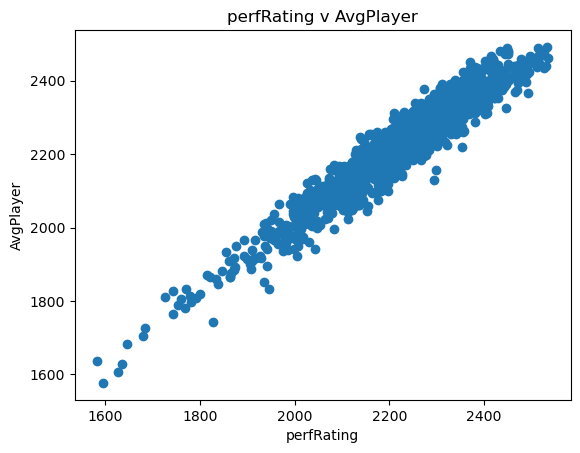

PearsonRResult(statistic=0.9542940663972459, pvalue=0.0)


In [18]:
from matplotlib import pyplot as plt
from scipy.stats import pearsonr
import numpy as np

plt.title("perfRating v AvgPlayer")
plt.xlabel("perfRating")
plt.ylabel("AvgPlayer")
plt.scatter(df['Perf Rating'], df['Avg Player'])
plt.show()

corr = pearsonr(df['Perf Rating'], df['Avg Player'])
print(corr)

The average rating seems to be highly correlated with the performance rating, I will use the performance rating for the effectiveness index and remove the average rating to avoid multicollinearity.


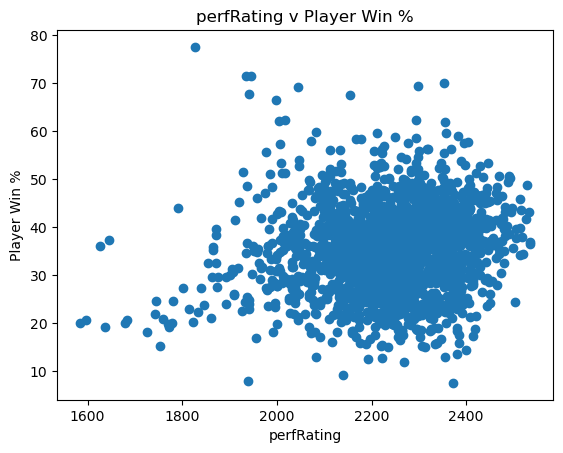

PearsonRResult(statistic=0.11582083724744513, pvalue=4.634750098109359e-07)


In [17]:
plt.title("perfRating v Player Win %")
plt.xlabel("perfRating")
plt.ylabel("Player Win %")
plt.scatter(df['Perf Rating'], df['Player Win %'])
plt.show()

corr = pearsonr(df['Perf Rating'], df['Player Win %'])
print(corr)

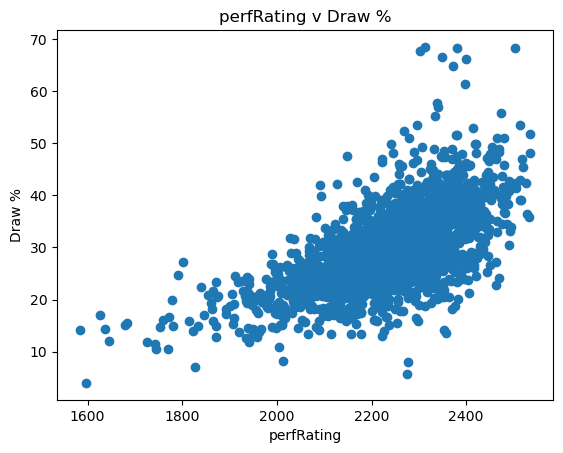

PearsonRResult(statistic=0.6304926904333537, pvalue=2.4539318506598297e-209)


In [19]:
plt.title("perfRating v Draw %")
plt.xlabel("perfRating")
plt.ylabel("Draw %")
plt.scatter(df['Perf Rating'], df['Draw %'])
plt.show()

corr = pearsonr(df['Perf Rating'], df['Draw %'])
print(corr)

We can see that the performance rating doesn't have a strong correlation with the win or draw pourcentage.

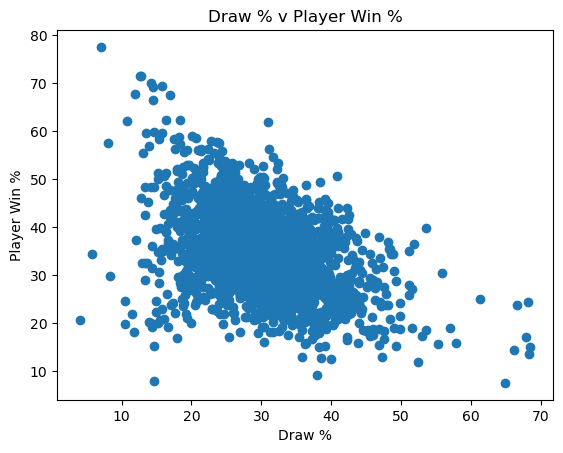

PearsonRResult(statistic=-0.4302600400955256, pvalue=9.270625196774843e-86)


In [20]:
plt.title("Draw % v Player Win %")
plt.xlabel("Draw %")
plt.ylabel("Player Win %")
plt.scatter(df['Draw %'], df['Player Win %'])
plt.show()

corr = pearsonr(df['Draw %'], df['Player Win %'])
print(corr)

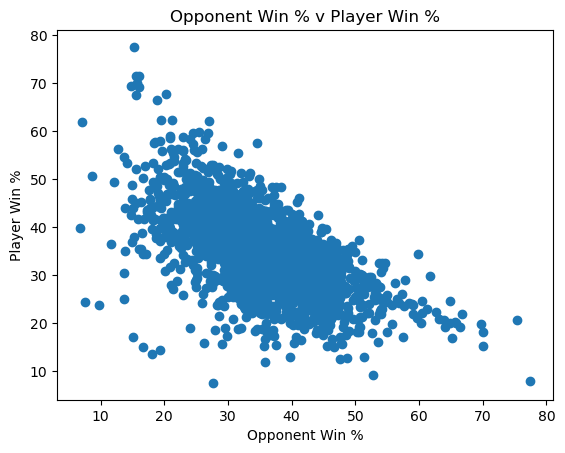

PearsonRResult(statistic=-0.6119189973077044, pvalue=5.799913811048905e-194)


In [24]:
plt.title("Opponent Win % v Player Win %")
plt.xlabel("Opponent Win %")
plt.ylabel("Player Win %")
plt.scatter(df['Opponent Win %'], df['Player Win %'])
plt.show()

corr = pearsonr(df['Opponent Win %'], df['Player Win %'])
print(corr)


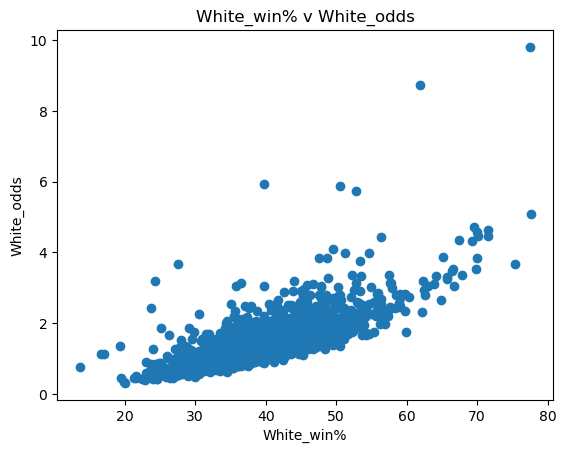

PearsonRResult(statistic=0.7383106666725844, pvalue=0.0)


In [23]:
plt.title("White_win% v White_odds")
plt.xlabel("White_win%")
plt.ylabel("White_odds")
plt.scatter(df['White_win%'], df['White_odds'])
plt.show()

corr = pearsonr(df['White_win%'], df['White_odds'])
print(corr)

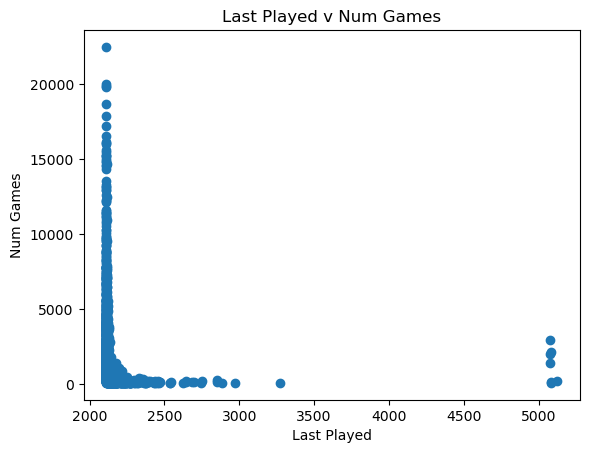

PearsonRResult(statistic=-0.0953319990007404, pvalue=3.4042532064717565e-05)


In [32]:
plt.title("Last Played v Num Games")
plt.xlabel("Last Played")
plt.ylabel("Num Games")
plt.scatter(last_played, df['Num Games'])
plt.show()

corr = pearsonr(last_played, df['Num Games'])
print(corr)

In [ ]:
# outlier detection


In [25]:
import numpy as np
from sklearn.linear_model import LinearRegression

In [26]:
model = LinearRegression()
model.fit(df[['Perf Rating']], df['Player Win %'])
r_sq = model.score(df[['Perf Rating']], df['Player Win %'])
print(r_sq)



0.013414466340699316


In [33]:
# Normalisation

